In [1]:
from src.config import config
import os
img_dir = os.path.join(config["DATA_DIR"], "3D_val_npz")
gts_dir = os.path.join(config["DATA_DIR"], "3D_val_gt_interactive_seg")
output_dir = os.path.join(config["RESULTS_DIR"], "nnint")

Loaded configuration for machine: nora


In [20]:
all_cases = sorted([f for f in os.listdir(img_dir) if f.endswith(".npz")])
processed_cases = sorted([f for f in os.listdir(output_dir) if f.endswith(".npz")])
remaining_cases = sorted(list(set(all_cases) - set(processed_cases)))

In [22]:
len(processed_cases)

2070

In [23]:
output_dir

'/nfs/data/nii/data1/Analysis/GPUnet/ANALYSIS_incontext/SegFM3D/results/nnint'

In [9]:
import numpy as np
#list_nb_classes = []
shapes = []
for case_filename in remaining_cases:
    gt_filepath = os.path.join(gts_dir, case_filename)
    gt_data = np.load(gt_filepath)
    gts = gt_data["gts"]
    shapes.append(gts.shape)

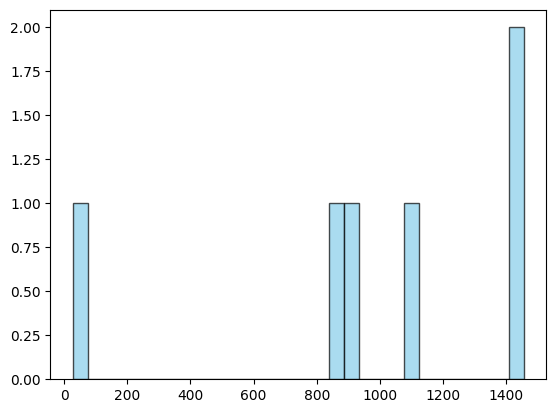

(array([1, 2, 5]),)


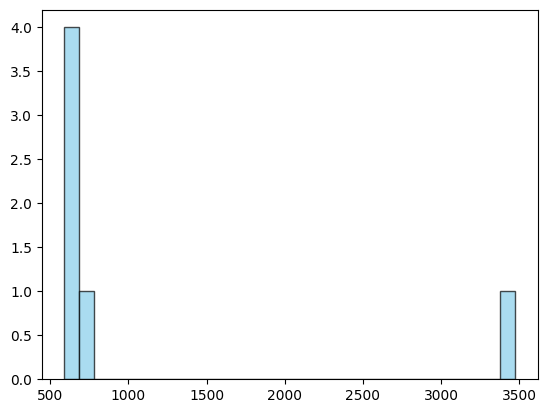

(array([0]),)


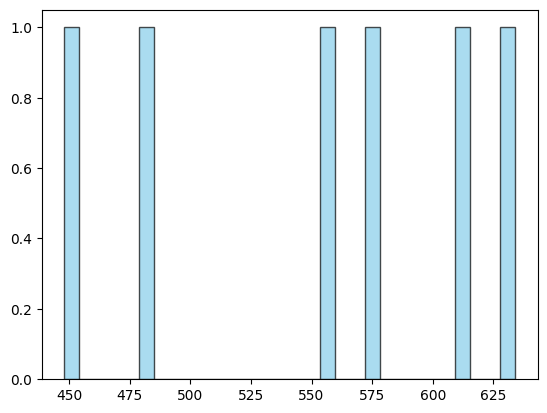

(array([], dtype=int64),)


In [10]:
from matplotlib import pyplot as plt


shapes = np.array(shapes)
for i in range(3):
    plt.hist(shapes[:,i], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.show()  
    print(np.where(shapes[:,i] > 1000))


In [10]:
data = np.array(list_nb_classes)
positions = np.where(data > 30)[0]

In [11]:
print(positions)
print(data[positions])

[ 92  93  99 103 105 122 124 125 138 139 144 149 160 173 180 184 187 190
 197 199 203 204 205 208 209 211 212 213 214]
[ 41  55  43  52  31  32  35  35  33  47  38  77  31  96  33  70  55  60
  47  44  75  34  42 103  64  46  88  34  37]


In [12]:
from segfm3d_nora_team.src.viz_tools import save_volume_viz


In [ ]:
for p in positions:
    print(remaining_cases[p])
    case_filename = remaining_cases[p]
    gt_filepath = os.path.join(gts_dir, case_filename)
    gt_data = np.load(gt_filepath)
    gts = gt_data["gts"]
    unique_gts = np.sort(np.unique(gts))
    print(len(unique_gts))
    shape_gt_z = gts.shape[0]
    save_volume_viz(gts, slice_indices = list(range(0,shape_gt_z,6)), show=True)

In [ ]:
from segfm3d_nora_team.src.viz_tools import save_volume_viz
save_volume_viz(gts, slice_indices = list(range(34,51,4)), show=True)

In [14]:
case_filename = "MR_Spider_186_t1_vet.npz"
gt_filepath = os.path.join(gts_dir, case_filename)
gt_data = np.load(gt_filepath)
gts = gt_data["gts"]
unique_gts = np.sort(np.unique(gts))

In [16]:
print(len(unique_gts))
gts.shape

8


(28, 3473, 448)

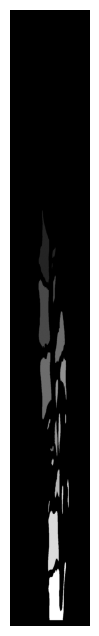

In [18]:
save_volume_viz(gts, show=True)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(list_nb_classes, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.grid(alpha=0.3)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')

# Display the plot
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import torch
torch.cuda.is_available()


False

In [11]:
volume_path = "/nfs/data/nii/data1/Analysis/GPUnet/ANALYSIS_incontext/SegFM3D/results/nnint/MR_Spider_75_t1_ivd.npz"
vol = np.load(volume_path, allow_pickle=True)
print(vol.keys())

KeysView(NpzFile '/nfs/data/nii/data1/Analysis/GPUnet/ANALYSIS_incontext/SegFM3D/results/nnint/MR_Spider_75_t1_ivd.npz' with keys: segs, all_segs)


In [12]:
print(vol["segs"].shape)
print(np.unique(vol["segs"], return_counts=True))

(14, 462, 448)
(array([0, 1, 2, 3, 4, 5, 6], dtype=uint8), array([2869918,    5067,    6410,    5234,    5128,    3541,    2366]))


In [3]:
volume_path = "/nfs/norasys/notebooks/camaret/segfm3d_nora_team/docker_submission/data/inputs/3D_val_npz/CT_AbdomenAtlas_BDMAP_00000006.npz"
vol = np.load(volume_path, allow_pickle=True)
print(vol.keys())

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/norasys/notebooks/camaret/segfm3d_nora_team/docker_submission/data/inputs/3D_val_npz/CT_AbdomenAtlas_BDMAP_00000006.npz'

In [ ]:
volume_path = "/nfs/norasys/notebooks/camaret/segfm3d_nora_team/docker_submission/inputs/CT_AbdomenAtlas_BDMAP_00000006.npz"
vol = np.load(volume_path, allow_pickle=True)
print(vol.keys())

In [5]:
volume_path = "/nfs/norasys/notebooks/camaret/cvpr25/test_demo/imgs/2DBox_Microscope_demo.npz"
vol = np.load(volume_path, allow_pickle=True)
print(vol.keys())
print(vol["boxes"])

KeysView(NpzFile '/nfs/norasys/notebooks/camaret/cvpr25/test_demo/imgs/2DBox_Microscope_demo.npz' with keys: imgs, boxes)
[[  0  97  66 236]
 [  0 267  84 386]
 [  0 387  34 522]
 [ 29 407 133 522]
 [ 63   0 223 181]
 [ 89 204 232 325]
 [112 310 244 441]
 [122 456 244 522]
 [247 363 384 487]
 [247 108 404 245]
 [251 498 371 522]
 [268   0 391  95]
 [297 240 425 362]
 [381 293 502 435]
 [418   0 552 129]
 [431 153 565 281]
 [493 299 625 443]
 [564   0 703 142]
 [590 190 723 318]
 [608 439 754 522]
 [667 298 775 424]
 [694  82 775 190]]


In [20]:
import os
path = "/nfs/norasys/notebooks/camaret/cvpr25/test_demo/test_example/imgs"
for f in os.listdir(path):
    print(f)
    try:
        vol = np.load(os.path.join(path,f), allow_pickle=True)
        print(vol["boxes"])
    except Exception as e:
        print(e)

MR_demo.npz
[{'z_min': 181, 'z_max': 241, 'z_mid': 214, 'z_mid_x_min': 99, 'z_mid_y_min': 24, 'z_mid_x_max': 184, 'z_mid_y_max': 80}
 {'z_min': 52, 'z_max': 175, 'z_mid': 120, 'z_mid_x_min': 296, 'z_mid_y_min': 28, 'z_mid_x_max': 378, 'z_mid_y_max': 85}
 {'z_min': 56, 'z_max': 185, 'z_mid': 129, 'z_mid_x_min': 118, 'z_mid_y_min': 28, 'z_mid_x_max': 204, 'z_mid_y_max': 81}
 {'z_min': 169, 'z_max': 204, 'z_mid': 185, 'z_mid_x_min': 305, 'z_mid_y_min': 86, 'z_mid_x_max': 386, 'z_mid_y_max': 134}
 {'z_min': 226, 'z_max': 450, 'z_mid': 301, 'z_mid_x_min': 218, 'z_mid_y_min': 53, 'z_mid_x_max': 235, 'z_mid_y_max': 61}
 {'z_min': 108, 'z_max': 290, 'z_mid': 218, 'z_mid_x_min': 207, 'z_mid_y_min': 7, 'z_mid_x_max': 421, 'z_mid_y_max': 167}
 {'z_min': 167, 'z_max': 241, 'z_mid': 208, 'z_mid_x_min': 154, 'z_mid_y_min': 68, 'z_mid_x_max': 245, 'z_mid_y_max': 167}
 {'z_min': 7, 'z_max': 450, 'z_mid': 342, 'z_mid_x_min': 48, 'z_mid_y_min': 0, 'z_mid_x_max': 298, 'z_mid_y_max': 116}
 {'z_min': 0, 'z